# Part III and IV

# AI

"We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that we did not receive any external help, coaching or contributions during the production of this work."

Sabariis Venugopal Sankaranarayanan, 
Neil Jayesh Doshi

## Data Prep

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Data = pd.read_csv("penguins.csv")
df = pd.DataFrame(Data)

In [5]:
new = df.dropna(axis=0,inplace=False)

In [6]:
new['body_mass_g'] = new['body_mass_g'] / 6300.0
new['bill_length_mm'] = new['bill_length_mm'] / 59.60
new['bill_depth_mm'] = new['bill_depth_mm'] / 21.50
new['flipper_length_mm'] = new['flipper_length_mm'] / 231.0
#new['year'] = new['year'] / 2009.0
df = new.copy()

C:\Users\spred\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\spred\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\spred\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [7]:
df['species'] = pd.factorize(df['species'])[0]
df['island'] = pd.factorize(df['island'])[0]
df['sex'] = pd.factorize(df['sex'])[0]

In [8]:
y = df['sex']
x = df
x = x.drop('sex', axis=1)
x = x.drop('year', axis=1)
x = x.drop('species', axis=1)
x = x.drop('island', axis=1)

In [11]:
index = np.random.permutation(len(x))
split_size = int(0.8 * x.shape[0])
train = index[:split_size]
test = index[split_size:]
x_train, x_test = x.iloc[train], x.iloc[test]
y_train, y_test = y.iloc[train], y.iloc[test]

# Part III : Linear Regression

In [37]:
class LinearRegression:
    def __init__(self):
        self.learning_rate = 0.000001
        self.iterations = 100000
        self.weights = []
        self.bias = 0
        
    def cost(self, x, y):
        part1 = (y - np.dot(x,self.weights))
        part2 = np.dot(part1.T,part1)
        jw = 0.5*np.sum(part2)
        return jw
    
    def calculate_weight(self, x, y):
        part1 = np.linalg.inv(np.dot(np.transpose(x),x))
        part2 = np.dot(np.transpose(x),y)
        self.weights = np.dot(part1,part2)
            
    def predict(self, x):
        N,n = x.shape
        x_new = np.ones((N,n+1))
        x_new[0:N,1:n+1] = x
        x = x_new
        N,n = x.shape
        y_hat = np.dot(x,self.weights)
        y_predicted = []
        for i in y_hat:
            if(i >= 0):
                y_predicted.append(1)
            else:
                y_predicted.append(0)
        return y_predicted
    
    def fit(self, x, y):
        N,n = x.shape
        x_new = np.ones((N,n+1))
        x_new[0:N,1:n+1] = x
        x = x_new
        N,n = x.shape
        self.weights = np.zeros(n)
        self.calculate_weight(x, y)
        print(self.cost(x,y))
        print(self.weights)
    
#     def accuracy(self, x, y):
#         y_predicted = self.predict(x)
#         y_len = len(y_predicted)
#         y =y.tolist()
#         y_logical = np.zeros(y_len)
#         for i in range(0,len(y_predicted)):
#             if(y_predicted[i] == y[i]):
#                 y_logical[i] = 1
#         acc = (np.mean(y_logical))*100
#         print(self.weights)
#         print(acc)

In [44]:
linear = LinearRegression()
linear.fit(x_train, y_train)
y_predicted = linear.predict(x_test)

12.81881020509504
[ 5.67982269 -0.51929908 -3.92025913  0.29105252 -2.87829552]


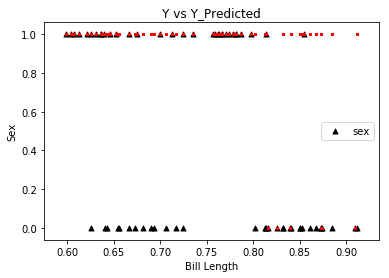

In [67]:
x_index = [i for i in range(0,len(y_predicted)) if i==i]
N,n = x_test.shape
x_new = np.array(x_test)
plt.scatter(x_new[0:N+1,0:1],y_test,marker='^',color='black', s = 25)
plt.legend()
plt.scatter(x_new[0:N+1,0:1],y_predicted,marker='s',color='red', s=5)
plt.xlabel("Bill Length")
plt.ylabel("Sex")
plt.title("Y vs Y_Predicted")
plt.legend()
plt.show()

# Ridge Regression

In [72]:
class RidgeRegression:
    def __init__(self, lam_in):
        self.weights = []
        self.lam = lam_in
    
    def calculate_weight(self, x, y):
        N,n = x.shape
        part1 = np.linalg.inv(np.dot(x.T,x)+(self.lam*np.identity(n)))
        part2 = np.dot(x.T,y)
        self.weights = np.dot(part1,part2)
    
    def cost(self, x, y):
        part1 = (y - np.dot(x,self.weights))
        part2 = np.dot(part1.T,part1)
        part3 = part2 + (0.5*self.lam*np.dot(self.weights.T,self.weights))
        jw = 0.5*np.sum(part3)
        return jw
            
    def predict(self, x):
        N,n = x.shape
        x_new = np.ones((N,n+1))
        x_new[0:N,1:n+1] = x
        x = x_new
        N,n = x.shape
        y_hat = np.dot(x,self.weights)
        y_predicted = []
        for i in y_hat:
            if(i >= 0):
                y_predicted.append(1)
            else:
                y_predicted.append(0)
        return y_predicted
    
    def fit(self, x, y):
        N,n = x.shape
        x_new = np.ones((N,n+1))
        x_new[0:N,1:n+1] = x
        x = x_new
        N,n = x.shape
        self.weights = np.zeros(n)
        self.calculate_weight(x, y)
        print(self.cost(x,y))
        print(self.weights)
    
#     def accuracy(self, x, y):
#         y_predicted = self.predict(x)
#         y_len = len(y_predicted)
#         y =y.tolist()
#         y_logical = np.zeros(y_len)
#         for i in range(0,len(y_predicted)):
#             if(y_predicted[i] == y[i]):
#                 y_logical[i] = 1
#         acc = (np.mean(y_logical))*100
#         print(self.weights)
#         print(acc)

In [73]:
ridge1 = RidgeRegression(0)
ridge1.fit(x_train, y_train)
yp1 = ridge1.predict(x_test)

12.81881020509504
[ 5.67982269 -0.51929908 -3.92025913  0.29105252 -2.87829552]


In [74]:
ridge2 = RidgeRegression(0.001)
ridge2.fit(x_train, y_train)
yp2 = ridge2.predict(x_test)

12.832876899156519
[ 5.65793146 -0.52132362 -3.91098268  0.31179451 -2.88143219]


In [75]:
ridge3 = RidgeRegression(0.01)
ridge3.fit(x_train, y_train)
yp3 = ridge3.predict(x_test)

12.959266419060233
[ 5.47643582 -0.53706029 -3.83207919  0.47858678 -2.90424976]


In [76]:
ridge4 = RidgeRegression(0.1)
ridge4.fit(x_train, y_train)
yp4 = ridge4.predict(x_test)

14.155622816396695
[ 4.42905939 -0.5787273  -3.28300646  1.19725489 -2.88515   ]


In [77]:
ridge5 = RidgeRegression(1)
ridge5.fit(x_train, y_train)
yp5 = ridge5.predict(x_test)

21.74342885476474
[ 2.14260253 -0.3277971  -1.43742256  1.02423537 -1.72995888]


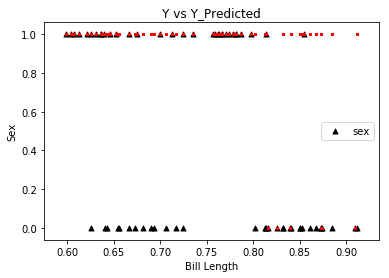

In [78]:
x_index = [i for i in range(0,len(y_predicted)) if i==i]
N,n = x_test.shape
x_new = np.array(x_test)
plt.scatter(x_new[0:N+1,0:1],y_test,marker='^',color='black', s = 25)
plt.legend()
plt.scatter(x_new[0:N+1,0:1],yp1,marker='s',color='red', s=5)
plt.xlabel("Bill Length")
plt.ylabel("Sex")
plt.title("Y vs Y_Predicted")
plt.legend()
plt.show()